# Prediction of Spam Messages

## 1. Defining the Question

### a) Specifying the Question

We are looking to predict whether a message is spam or not

### b) Defining the Metric for Success

Looking to achieve an accuracy score of 80%

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset
df = pd.read_csv('spambase.data')

In [3]:
# Loading the names files
with open("spambase.names") as f:
    print(f.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [4]:
#Assigning the column names
df.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
df.shape

(4600, 58)

In [6]:
# Previewing the top of our dataset
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [7]:
# Previewing the bottom of our dataset
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [8]:
# Checking whether each column has an appropriate datatypes
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## 5. Tidying the Dataset

In [9]:
columns = df.drop(columns=['class'])

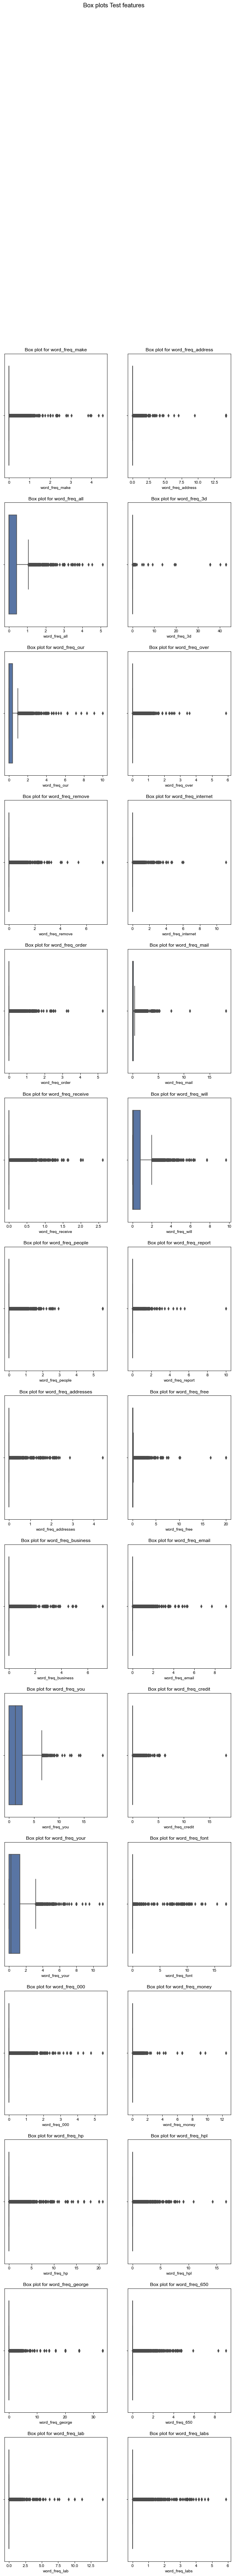

In [10]:
# Checking for Outliers
# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 15, ncols = 2, figsize = (10,100))

# labeling the title
fig.suptitle('Box plots Test features', y= 1, fontsize = 15)

sns.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), df, columns):
    sns.boxplot(df[name], ax = ax)
    ax.set_title('Box plot for '+ name)
plt.show()

There are outliers in the dataset. However, we will not drop them as they are true values.

In [11]:
# Identifying the Missing Data
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [12]:
# Dealing with the Missing Data
df.duplicated().sum()

391

There are 391 duplicate values

In [13]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

## 6. Exploratory Analysis

### 6.1 Univariate Analysis

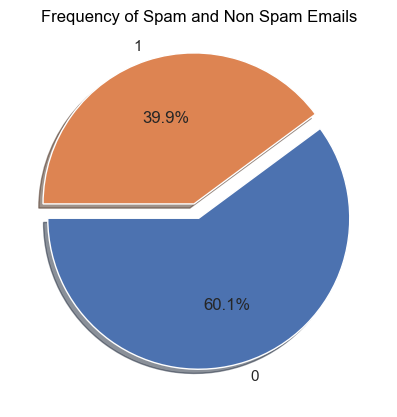

In [14]:
#Pie chart of spam emails
accounts = df['class'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0,0.1), shadow=True, startangle=180)
plt.title('Frequency of Spam and Non Spam Emails', color='black')
plt.show()

Most of the emails are not spam

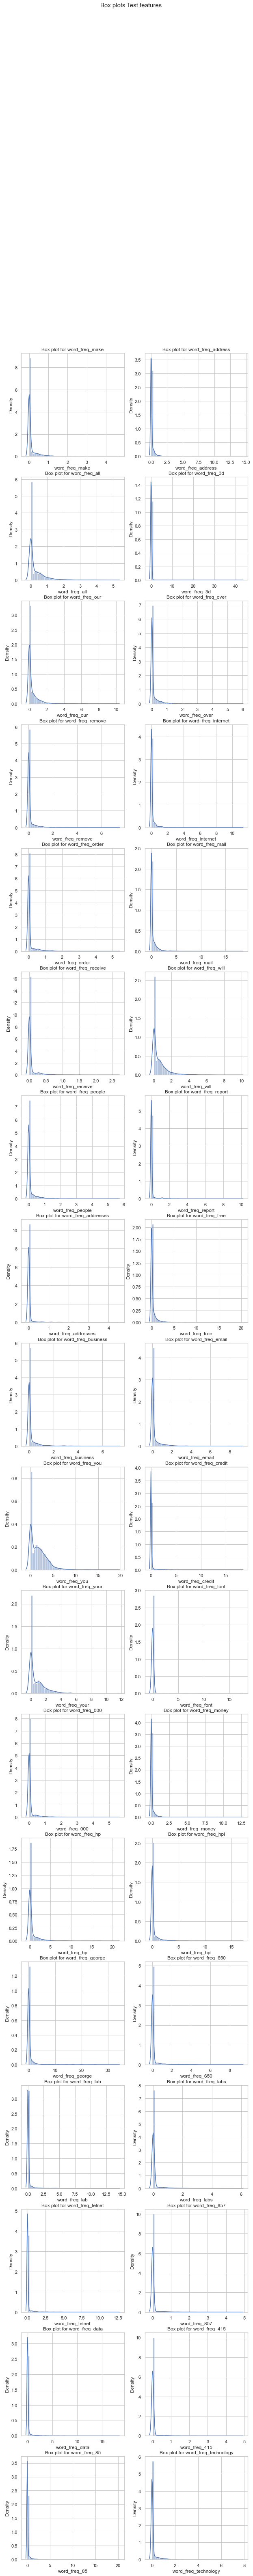

In [15]:
#Plotting histogram of all the columns
# Checking for Outliers
# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows= 18, ncols = 2, figsize = (10,100))

# labeling the title
fig.suptitle('Box plots Test features', y= 1, fontsize = 15)

sns.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), df, columns):
    sns.distplot(df[name], ax = ax)
    ax.set_title('Box plot for '+ name)
plt.show()

In [16]:
# Checking the mean
columns.mean()

word_freq_make                  0.104576
word_freq_address               0.212922
word_freq_all                   0.280578
word_freq_3d                    0.065439
word_freq_our                   0.312222
word_freq_over                  0.095922
word_freq_remove                0.114233
word_freq_internet              0.105317
word_freq_order                 0.090087
word_freq_mail                  0.239465
word_freq_receive               0.059837
word_freq_will                  0.541680
word_freq_people                0.093950
word_freq_report                0.058639
word_freq_addresses             0.049215
word_freq_free                  0.248833
word_freq_business              0.142617
word_freq_email                 0.184504
word_freq_you                   1.662041
word_freq_credit                0.085596
word_freq_your                  0.809728
word_freq_font                  0.121228
word_freq_000                   0.101667
word_freq_money                 0.094289
word_freq_hp    

In [17]:
#Checking the mode of the variables
columns.mode()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5


In [18]:
#Checking the median of the variables
columns.median()

word_freq_make                 0.0000
word_freq_address              0.0000
word_freq_all                  0.0000
word_freq_3d                   0.0000
word_freq_our                  0.0000
word_freq_over                 0.0000
word_freq_remove               0.0000
word_freq_internet             0.0000
word_freq_order                0.0000
word_freq_mail                 0.0000
word_freq_receive              0.0000
word_freq_will                 0.1000
word_freq_people               0.0000
word_freq_report               0.0000
word_freq_addresses            0.0000
word_freq_free                 0.0000
word_freq_business             0.0000
word_freq_email                0.0000
word_freq_you                  1.3100
word_freq_credit               0.0000
word_freq_your                 0.2200
word_freq_font                 0.0000
word_freq_000                  0.0000
word_freq_money                0.0000
word_freq_hp                   0.0000
word_freq_hpl                  0.0000
word_freq_ge

In [19]:
#Standard Deviation
columns.std()

word_freq_make                  0.305387
word_freq_address               1.290700
word_freq_all                   0.504170
word_freq_3d                    1.395303
word_freq_our                   0.672586
word_freq_over                  0.273850
word_freq_remove                0.391480
word_freq_internet              0.401112
word_freq_order                 0.278643
word_freq_mail                  0.644816
word_freq_receive               0.201565
word_freq_will                  0.861791
word_freq_people                0.301065
word_freq_report                0.335219
word_freq_addresses             0.258871
word_freq_free                  0.825881
word_freq_business              0.444099
word_freq_email                 0.530930
word_freq_you                   1.775669
word_freq_credit                0.509821
word_freq_your                  1.200938
word_freq_font                  1.025866
word_freq_000                   0.350321
word_freq_money                 0.442681
word_freq_hp    

In [20]:
#Variance
columns.var()

word_freq_make                     0.093261
word_freq_address                  1.665907
word_freq_all                      0.254187
word_freq_3d                       1.946870
word_freq_our                      0.452372
word_freq_over                     0.074994
word_freq_remove                   0.153257
word_freq_internet                 0.160891
word_freq_order                    0.077642
word_freq_mail                     0.415787
word_freq_receive                  0.040628
word_freq_will                     0.742684
word_freq_people                   0.090640
word_freq_report                   0.112372
word_freq_addresses                0.067014
word_freq_free                     0.682079
word_freq_business                 0.197224
word_freq_email                    0.281887
word_freq_you                      3.153001
word_freq_credit                   0.259917
word_freq_your                     1.442253
word_freq_font                     1.052400
word_freq_000                   

In [21]:
#Skewness
columns.skew()

word_freq_make                 5.675025
word_freq_address             10.086283
word_freq_all                  3.009807
word_freq_3d                  26.224884
word_freq_our                  4.746618
word_freq_over                 5.956325
word_freq_remove               6.764849
word_freq_internet             9.723843
word_freq_order                5.225474
word_freq_mail                 8.487038
word_freq_receive              5.509622
word_freq_will                 2.867128
word_freq_people               6.954817
word_freq_report              11.753373
word_freq_addresses            6.970243
word_freq_free                10.762507
word_freq_business             5.688013
word_freq_email                5.420216
word_freq_you                  1.591611
word_freq_credit              14.601026
word_freq_your                 2.435356
word_freq_font                 9.974326
word_freq_000                  5.713128
word_freq_money               14.685513
word_freq_hp                   5.716217


Most of the data is skewed to the right

In [22]:
#Kurtosis
columns.kurt()

word_freq_make                  49.294680
word_freq_address              105.631955
word_freq_all                   13.310616
word_freq_3d                   726.292795
word_freq_our                   37.932330
word_freq_over                  68.431738
word_freq_remove                75.397597
word_freq_internet             169.128434
word_freq_order                 46.930209
word_freq_mail                 161.186086
word_freq_receive               39.641894
word_freq_will                  12.547742
word_freq_people                84.924560
word_freq_report               229.152157
word_freq_addresses             57.714291
word_freq_free                 196.383129
word_freq_business              45.663797
word_freq_email                 48.052430
word_freq_you                    5.255891
word_freq_credit               382.920673
word_freq_your                   9.007245
word_freq_font                 109.117632
word_freq_000                   46.797425
word_freq_money                301

There are extreme values in the dataset.

## 7. Implementing the Solution

In [23]:
# Implementing the Solution Using Naive Bayes Clasifier
#splitting data into target and features
X=df.drop(["class"], axis=1)
y=df[["class"]]

### 7.1 Using 80-20 Split

In [24]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Using Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[482  13]
 [148 199]]
80.87885985748218


We get an accuracy of 80% using Gaussian Naive Bayes and splitting into 80-20

### 7.2 Using 70-30 Split

In [27]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Using Gaussian Naive Bayes
model1 = GaussianNB()
model1.fit(X_train, y_train)
#making predictions
y_pred= model1.predict(X_test)
# model score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[715  22]
 [216 310]]
81.15597783056215


We get an accuracy of 81.15%

### 7.3 Using a 60-40 Split

In [28]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Using Gaussian Naive Bayes
model2 = GaussianNB()
model2.fit(X_train, y_train)
#making predictions
y_pred= model2.predict(X_test)
# model score
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[958  36]
 [293 397]]
80.46318289786223


We achieve an accuracy of 80.46%

## 8. Challenging the solution

### 8.1 Multinomial Naive Bayes Classifier

In [29]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Using Gaussian Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[264 231]
 [  4 343]]
72.09026128266032


We achieve an accuracy score of 72% using multinomial naive bayes classifier and a 80-20 split

In [30]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Using Gaussian Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[397 340]
 [  8 518]]
72.44655581947742


Model accuracy score using Multinomial naive bayes and a 70-30 split is 72.44%

In [31]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Using Gaussian Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[264 231]
 [  4 343]]
72.09026128266032


Model accuracy score using Multinomial naive bayes and a 70-30 split is 72.09%

### 8.2 Bernouli Naive Bayes Classifier

In [32]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Using Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[480  15]
 [ 75 272]]
89.31116389548693


We get an accuracy score of 89.31% using a 80-20 split

In [33]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Using Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[713  24]
 [116 410]]
88.91528107680126


We achieve a model score of 88.91% using a 70-30 split

In [34]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Using Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[963  31]
 [154 536]]
89.01425178147268


We achieve a model score of 89.01% using a 60-40 split

## 9. Reccomendations

The bernoulli model is the most accurate and the best train to test split size is 80-20